### import

In [1]:
# import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', family='NanumGothic')
sns.set(style="whitegrid")

plt.rcParams['font.family']

In [3]:
ls

daily_train.csv              immoral.csv             merged_dktc_train.csv
daily_val.csv                immoral_over_1_5.csv    Untitled.ipynb
dktc_ori_exp_0422_82e-2.csv  immoral_over_1_7.csv
dktc_ori_imp_0422_82e-2.csv  immoral_over_2_0_v.csv


### load data 

In [3]:
df_daily = pd.read_csv("daily_train.csv")
df_immo = pd.read_csv("immoral.csv")
df_dktc = pd.read_csv("DKTC_train.csv")
df_exp = pd.read_csv("dktc_ori_exp_0422_82e-2.csv")
df_imp = pd.read_csv("dktc_ori_imp_0422_82e-2.csv")

In [4]:
df_immo['Unnamed: 0'] = df_immo['class']
df_immo = df_immo[['Unnamed: 0', 'conversation']]
df_immo.rename(columns={"Unnamed: 0" : "class"}, inplace=True)

In [5]:
df_daily = df_daily[['class', "conversation"]]
df_dktc = df_dktc[['class', "conversation"]]
df_imp = df_imp[['class', "conversation"]]
df_exp = df_exp[['class', "conversation"]]

In [12]:
df_imp.head()

,class,conversation
0,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
1,직장 내 괴롭힘 대화,나 이틀 뒤에 가나다 음식점 예약 좀 해줘. 저녁 7시로.\n가나다 음식점이요.\n...
2,갈취 대화,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...
3,갈취 대화,잠깐만 거기 학생.\n예?\n저 부르셨어요?\n그럼 누구겠어.\n왜 부르시죠.\n내...
4,협박 대화,네가 민수라는 남자 제자니?\n네 맞는데요 왜 그러시죠? 혹시 저희 선생님께 무슨 ...


In [13]:
df_exp.head()

,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n아닙니다.\n죄송합니다.\n죽을 거...
1,협박 대화,길동 경찰서입니다.\n9시 40분 마트에 폭발물을 설치할 거다.\n네?\n똑바로 들...
2,기타 괴롭힘 대화,너 되게 귀여운 거 알지?\n나보다 작은 남자는 첨 봤어.\n그만해.\n너희들 놀리...
3,갈취 대화,어이 거기.\n예?\n너 말이야 너. 이리 오라고.\n무슨 일.\n너 옷 좋아 보인...
4,기타 괴롭힘 대화,35번 손님 아이스커피 두 잔 나왔습니다.\n아이스커피?\n네 맛있게 드세요.\n저...


### concat

In [6]:
df1 = pd.concat([df_daily, df_dktc, df_immo], 
                       join='inner', axis=0)

df2 = pd.concat([df_imp, df_exp], 
            join='inner', axis=0)

In [24]:
df1['class'].value_counts()

위협대화           118140
일상대화            87689
기타 괴롭힘 대화        1563
갈취 대화            1379
직장 내 괴롭힘 대화      1346
협박 대화            1279
Name: class, dtype: int64

In [25]:
df2['class'].value_counts()

기타 괴롭힘 대화      1094
갈취 대화           979
직장 내 괴롭힘 대화     976
협박 대화           891
Name: class, dtype: int64

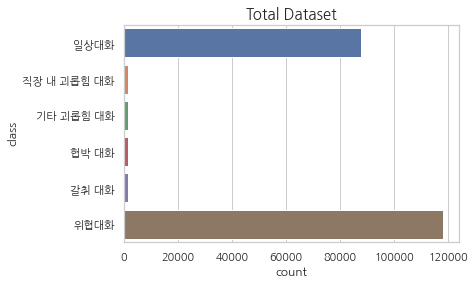

In [47]:
sns.countplot(y='class', data=df1)
plt.title("Total Dataset", fontsize=15);

In [61]:
labels = ['갈취 대화', '기타 괴롭힘 대화', '직장 내 괴롭힘 대화', '협박 대화']

In [60]:
df_dktc['class'].value_counts().sort_index()

갈취 대화          1379
기타 괴롭힘 대화      1563
직장 내 괴롭힘 대화    1346
협박 대화          1279
Name: class, dtype: int64

In [57]:
df_imp['class'].value_counts()

갈취 대화          306
직장 내 괴롭힘 대화    246
기타 괴롭힘 대화      169
협박 대화          122
Name: class, dtype: int64

In [118]:
dktc_df['class'].value_counts().sort_index()

갈취 대화           981
기타 괴롭힘 대화      1094
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64

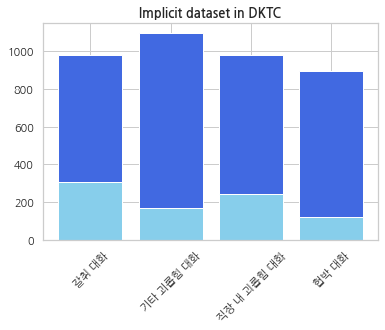

In [120]:
plt.bar(x=labels, height=df_dktc['class'].value_counts().sort_index(), color='royalblue' , label="dktc")
plt.bar(x=labels, height=df_imp['class'].value_counts().sort_index(), color='skyblue', label='implicit')
plt.xticks(rotation=45)
plt.title("Implicit dataset in DKTC", fontsize=13, fontweight="bold");

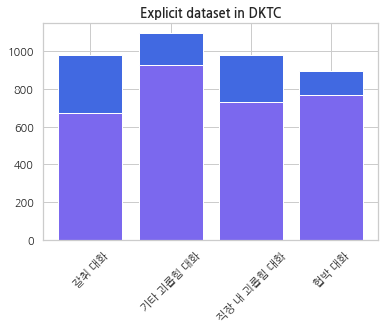

In [121]:
plt.bar(x=labels, height=df_dktc['class'].value_counts().sort_index(), color='royalblue' , label="dktc")
plt.bar(x=labels, height=df_exp['class'].value_counts().sort_index(), color='mediumslateblue', label='explicit')
plt.xticks(rotation=45)
plt.title("Explicit dataset in DKTC", fontsize=13, fontweight="bold");

In [73]:
df_exp['class'].value_counts().sort_index()

갈취 대화          673
기타 괴롭힘 대화      925
직장 내 괴롭힘 대화    730
협박 대화          769
Name: class, dtype: int64

In [106]:
color = sns.hls_palette(22, l= .85, s= .9)

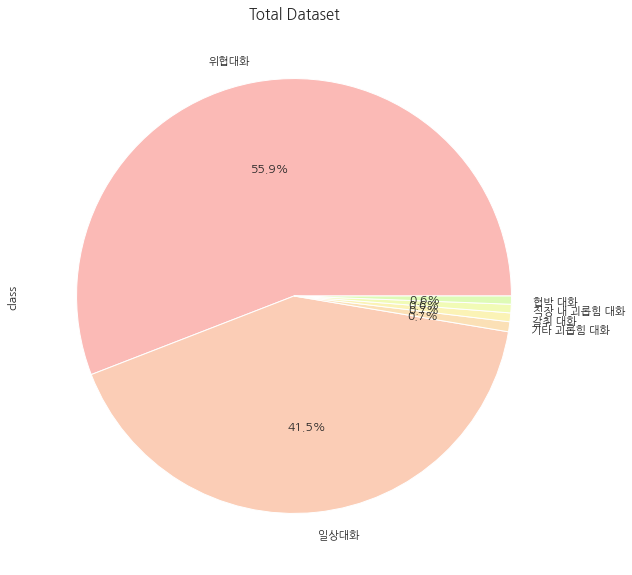

In [108]:
plt.figure(figsize= (10, 10))
df1['class'].value_counts().plot(kind='pie', autopct= '%1.1f%%', colors= color)
plt.title("Total Dataset", fontsize=15);